<a href="https://colab.research.google.com/github/rahmadalfianm/PCVK_Genap_2021/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM**

**Import Folder Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Beberapa Library**

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


**Global Threshold (Binary, Trunc, Tozero)**

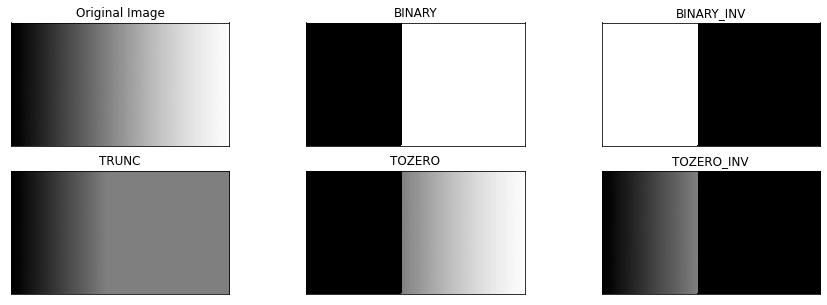

In [21]:
filename = ('/content/drive/MyDrive/PCVK_MM/Images/gradient.jpg')
img = cv2.imread(filename) 
thresh1 = cv2.imread(filename) 
thresh2 = cv2.imread(filename) 
thresh3 = cv2.imread(filename) 
thresh4 = cv2.imread(filename) 
thresh5 = cv2.imread(filename) 
thresh = 127    


thresh1[img>thresh] = 255           
thresh1[img<=thresh] = 0
thresh2 = 255 - thresh1            
thresh3[img>thresh] = thresh        
thresh4[img<=thresh] = 0            
thresh5[img>thresh] = 0             

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV'] 
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]


plt.figure(figsize = (15,5)) 
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest') 
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([]) 
plt.show()

**Otsu Thresholding**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


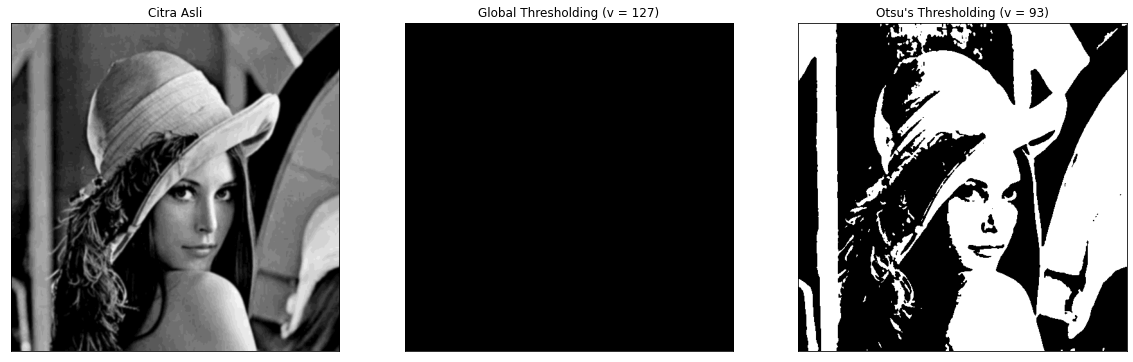

In [36]:

filename = ('/content/drive/MyDrive/PCVK_MM/Images/lena_gs_lc2.jpg')

img = cv2.imread(filename,0) 
blur = cv2. GaussianBlur (img, (5,5),0)

histogram = cv2.calcHist([blur],[0],None,[256], [0,256]) 
histogram_norm = histogram.ravel()/histogram.max() 
Q = histogram_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
threshold = -1 
for i in range(0,255):
  wb += histogram[i] 
  wf = (img.shape[0]*img.shape[1]) - wb 
  sumb += (i*histogram[i]) 
  mb = sumb / wb 
  mf = (sumb - sumb)/wf 
  betweenvar = wb * wf * (mb - mf) * (mb - mf) 
  if (betweenvar>varmax):
    varmax = betweenvar
    threshold = i 
x = ("Otsu's Thresholding (v = ")+str(threshold)+")" 
ret, thresholdGlobal = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY)
ret, thresholdOtsu = cv2.threshold (blur, thresh, 255, cv2. THRESH_BINARY)

names = ['Citra Asli', 'Global Thresholding (v = 127)', x] 
images = [blur, thresholdGlobal, thresholdOtsu]

plt. figure(figsize = (20,15)) 
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(images[i], 'gray') 
    plt.title(names[i])
    plt.xticks([]),plt.yticks([]) 
plt.show()

**Histogram dari citra tersegmentasi**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

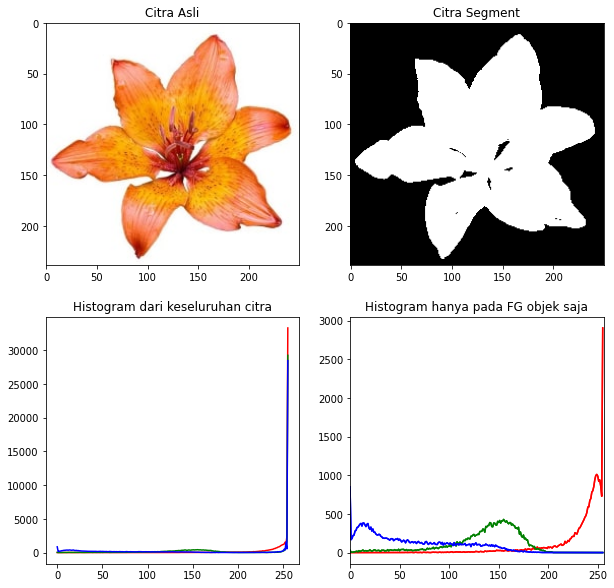

In [42]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
filename = ('/content/drive/MyDrive/PCVK_MM/Images/liliy.jpg')
img = cv2.imread(filename) 
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB) 
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10)) 
plt.subplot(2,2,1),plt.imshow(img) 
plt.title('Citra Asli') 
plt.subplot(2,2,2),plt.imshow(mask, 'gray') 
plt.title('Citra Segment') 
color = ('r','g','b') 
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256]) 
    plt.subplot(2,2,3),plt.plot(hist0,color = col) 
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra') 
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256]) 
    plt.subplot(2,2,4),plt.plot(hist1,color = col) 
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256]) 
plt.show()

**Segmentasi warna kuning saja dengan K-MEANS**

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc02ffd60d0>,
 <matplotlib.image.AxesImage at 0x7fc03064c350>)

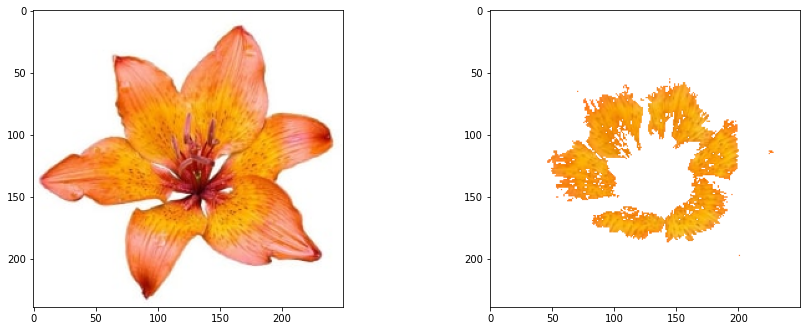

In [46]:
filename_4 = ('/content/drive/MyDrive/PCVK_MM/Images/liliy.jpg')
img_p = cv2.imread(filename_4) 
img_rgb2 = cv2.cvtColor(img_p,cv2.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

# syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)


# Soal: Saat anda menampilkan warna tertentu, jelaskan kendala yang dihadapi dan mengapa hal itu terjadi.
# Jawab: Kendala yang dihadapi adalah warna yang didapat random (acak) berdasarkan cluster terdekat.
# Jadi jika menginginkan keluaran gambar yang sama seperti di js, maka harus meng play sampai

**CROSSWORD**

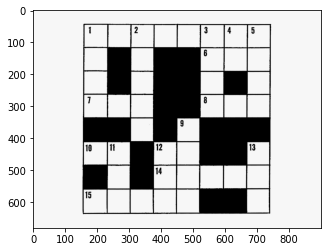

In [48]:
img_c = cv2.imread('/content/drive/MyDrive/PCVK_MM/Images/crossword.png')
img_rgb3 = cv2.cvtColor(img_c, cv2.COLOR_BGR2RGB)

ret, thresh = cv2.threshold(img_rgb3, 125, 255, cv2.THRESH_TOZERO)

plt.imshow(thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()